## Import libraries!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



## Load data

In [2]:
df = pd.read_csv('train.csv')
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, validation = df[df['is_train']==True], df[df['is_train']==False]

## Graphing continuous input variables

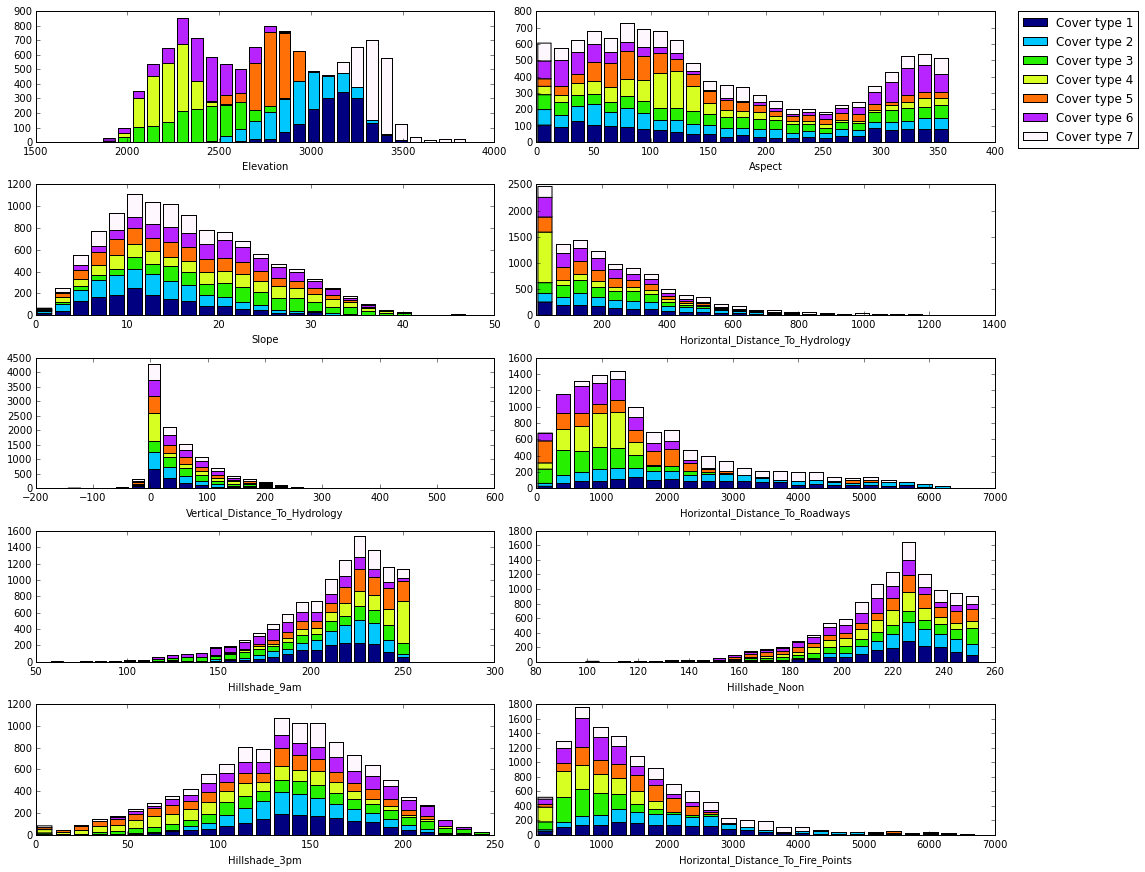

In [3]:
#list(train.columns.values[1:11])
fig = plt.figure(figsize=(14,12))

color_list = plt.cm.get_cmap("gist_ncar", 7)

for i in range(1, 11):
    y_split_sets = []
    for j in range(1,8):
        y_split_sets.append(train[train['Cover_Type']==j].ix[:,i])

    ax = fig.add_subplot(5,2,i)
    plt.hist(y_split_sets, 25, stacked=True, label=["Cover type "+str(i) for i in range(1,8)], color=color_list(np.arange(7)))
    plt.xlabel(train.columns.values[i])
    if(i==2):
        patches, labels = ax.get_legend_handles_labels()
        plt.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

## Soil Types Graph

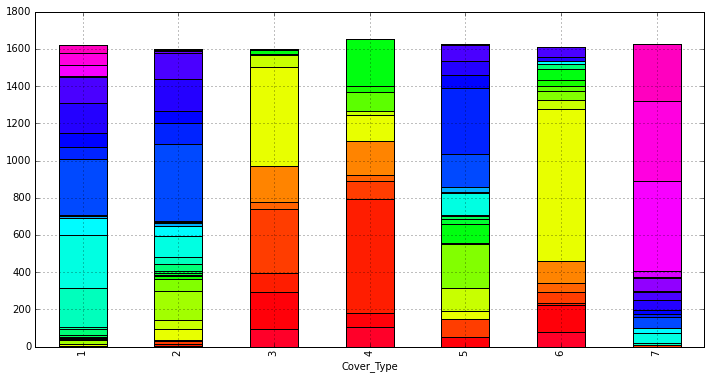

In [4]:
soil_cols = [a for a in list(train.columns.values) if a[:4] == "Soil"]

table = train.groupby("Cover_Type").sum()[soil_cols]

table.plot(kind='bar', stacked=True, legend=False, colormap="gist_rainbow", figsize=(12, 6))
plt.show()

## Wilderness Areas Graph

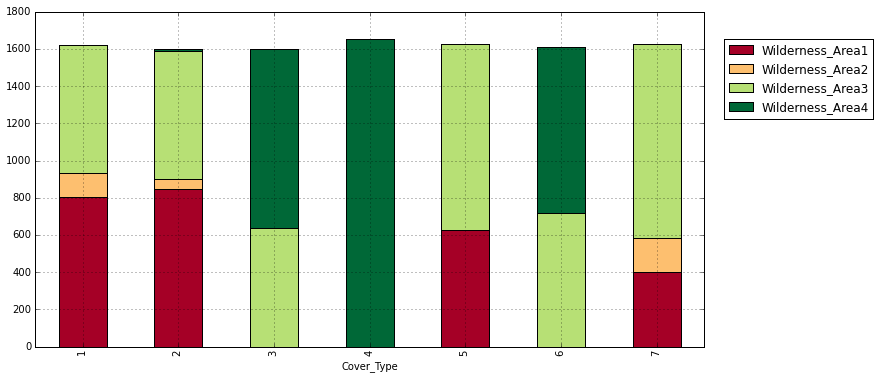

In [5]:
wa_cols = [a for a in list(train.columns.values) if a[:15] == "Wilderness_Area"]

table = train.groupby("Cover_Type").sum()[wa_cols]
ax = table.plot(kind='bar', legend=False, stacked=True, colormap="RdYlGn", figsize=(12, 6))

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='center left', bbox_to_anchor=(1.02, 0.8))

## Random Forest Test

In [6]:
features = train.columns[1:55]
clf = RandomForestClassifier()
y_training, _ = pd.factorize(train['Cover_Type'])
clf.fit(train[features], y_training)

y_validation, _ = pd.factorize(validation['Cover_Type'])
pd.Series([
        accuracy_score(y_training, clf.predict(train[features])),
        accuracy_score(y_validation, clf.predict(validation[features]))
    ], index=["Training accuracy", "Test accuracy"])




Training accuracy    0.994795
Test accuracy        0.823732
dtype: float64

## Naive Bayes Test

In [7]:
gnb = GaussianNB()
gnb_fitted = gnb.fit(train[features], y_training)
pd.Series([
        accuracy_score(y_training, gnb_fitted.predict(train[features])),
        accuracy_score(y_validation, gnb_fitted.predict(validation[features]))
    ], index=["Training accuracy", "Test accuracy"])




Training accuracy    0.479181
Test accuracy        0.464852
dtype: float64